# Multinomial Naive Bayes

Sentiment Analysis of financial news statements into three categories (Positive, Negative, Neutral). The dataset holds two features, the news statement and the sentiment for each news statement. The Multinomial Naive Bayes algorithm will be used on the vectorized and transformed data to predict the sentiment of each news statement in the testing phase.

### Import Libraries

In [1]:
import pandas as pd
import seaborn as sns

### Import Dataset(s)

In [2]:
df = pd.read_csv('../data/news-sentiment.csv')

In [3]:
df.head()

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5842 entries, 0 to 5841
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentence   5842 non-null   object
 1   Sentiment  5842 non-null   object
dtypes: object(2)
memory usage: 91.4+ KB


### Exploratory Data Analysis

<Axes: xlabel='Sentiment', ylabel='count'>

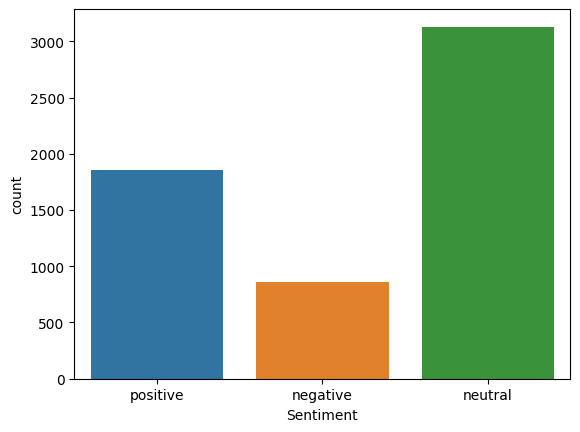

In [5]:
sns.countplot(df, x='Sentiment', hue='Sentiment')

### Train Test Split

In [6]:
X = df['Sentence']
y = df['Sentiment']

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

### Pipeline

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

In [9]:
pipe = Pipeline([
    ('count', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('mnb', MultinomialNB())
])

In [10]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('count', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('mnb', MultinomialNB())])

In [11]:
y_pred = pipe.predict(X_test)

### Metrics

In [12]:
from sklearn.metrics import classification_report

In [13]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       1.00      0.04      0.07       251
     neutral       0.62      0.98      0.76       926
    positive       0.76      0.37      0.50       576

    accuracy                           0.65      1753
   macro avg       0.79      0.46      0.44      1753
weighted avg       0.72      0.65      0.58      1753



### Grid Search

In [14]:
from sklearn.model_selection import GridSearchCV

In [15]:
params = {
    'count__ngram_range': [(1,1),(1,2),(2,2)],
    'tfidf__norm': ('l1','l2'),
    'tfidf__use_idf': (True,False),
    'mnb__alpha': [0.01,0.1,1,10,100]
}

In [16]:
clf = GridSearchCV(pipe, params, cv=10)

In [17]:
clf.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('count', CountVectorizer()),
                                       ('tfidf', TfidfTransformer()),
                                       ('mnb', MultinomialNB())]),
             param_grid={'count__ngram_range': [(1, 1), (1, 2), (2, 2)],
                         'mnb__alpha': [0.01, 0.1, 1, 10, 100],
                         'tfidf__norm': ('l1', 'l2'),
                         'tfidf__use_idf': (True, False)})

In [18]:
y_pred = clf.predict(X_test)

### Grid Search Metrics

In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.51      0.19      0.28       251
     neutral       0.68      0.92      0.78       926
    positive       0.78      0.56      0.65       576

    accuracy                           0.70      1753
   macro avg       0.66      0.56      0.57      1753
weighted avg       0.69      0.70      0.67      1753



In [20]:
clf.best_params_

{'count__ngram_range': (1, 1),
 'mnb__alpha': 0.1,
 'tfidf__norm': 'l2',
 'tfidf__use_idf': False}